In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
train.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
test = pd.read_csv('test.csv')
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [4]:
train.shape, test.shape

((10886, 12), (6493, 9))

In [5]:
# 날짜(datetime)을 연,월,일,시간으로 분리
train['dt_year'] = pd.to_datetime(train['datetime']).dt.year
train['dt_month'] = pd.to_datetime(train['datetime']).dt.month
train['dt_day'] = pd.to_datetime(train['datetime']).dt.day
train['dt_hour'] = pd.to_datetime(train['datetime']).dt.hour

In [6]:
# 요일
train['dt_yoil'] = pd.to_datetime(train['datetime']).dt.dayofweek

In [7]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dt_year,dt_month,dt_day,dt_hour,dt_yoil
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


In [8]:
# 연도별 대여량
train.groupby('dt_year')['count'].sum()

dt_year
2011     781979
2012    1303497
Name: count, dtype: int64

<AxesSubplot:xlabel='dt_year'>

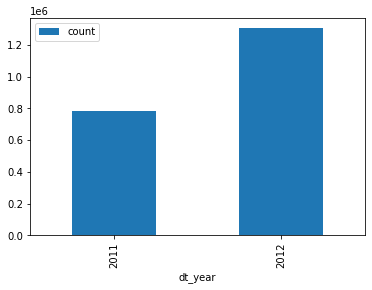

In [9]:
import matplotlib.pyplot as plt
group_df = pd.DataFrame(train.groupby('dt_year')['count'].sum())
group_df.plot(kind='bar')

<AxesSubplot:xlabel='dt_month'>

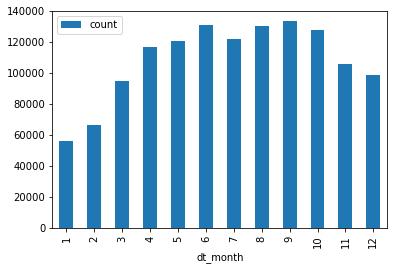

In [10]:
# 2012년 월별 대여량
group_df = pd.DataFrame(train[train['dt_year']==2012].groupby('dt_month')['count'].sum())
group_df.plot(kind='bar')

In [11]:
train.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,dt_year,dt_month,dt_day,dt_hour,dt_yoil
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439,-0.004797,0.971524,0.001729,-0.006546,-0.010553
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,0.001731,-0.015877,-0.000354,-0.191832
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,-0.003394,0.009829,0.002780,-0.704267
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655,-0.012548,0.012144,-0.007890,-0.022740,-0.047692
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.145430,-0.038466
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.140343,-0.040235
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,0.204537,-0.011335,-0.278011,-0.026507
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,-0.150192,0.036157,0.146631,-0.024804
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.302045,0.246959
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.380540,-0.084427


In [12]:
train.drop(['datetime','casual','registered'], axis=1, inplace=True)

In [13]:
train.head(10)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,dt_year,dt_month,dt_day,dt_hour,dt_yoil
0,1,0,0,1,9.84,14.395,81,0.0000,16,2011,1,1,0,5
1,1,0,0,1,9.02,13.635,80,0.0000,40,2011,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0000,32,2011,1,1,2,5
3,1,0,0,1,9.84,14.395,75,0.0000,13,2011,1,1,3,5
4,1,0,0,1,9.84,14.395,75,0.0000,1,2011,1,1,4,5
5,1,0,0,2,9.84,12.880,75,6.0032,1,2011,1,1,5,5
6,1,0,0,1,9.02,13.635,80,0.0000,2,2011,1,1,6,5
7,1,0,0,1,8.20,12.880,86,0.0000,3,2011,1,1,7,5
8,1,0,0,1,9.84,14.395,75,0.0000,8,2011,1,1,8,5
9,1,0,0,1,13.12,17.425,76,0.0000,14,2011,1,1,9,5


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   dt_year     10886 non-null  int64  
 10  dt_month    10886 non-null  int64  
 11  dt_day      10886 non-null  int64  
 12  dt_hour     10886 non-null  int64  
 13  dt_yoil     10886 non-null  int64  
dtypes: float64(3), int64(11)
memory usage: 1.2 MB


In [15]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(
                                    train.drop('count',1),
                                    train['count'],
                                    test_size = 0.2,
                                    random_state=42
)

In [16]:
train_x.shape, valid_x.shape, train_y.shape, valid_y.shape

((8708, 13), (2178, 13), (8708,), (2178,))

In [17]:
train_x = train_x.values.reshape(train_x.shape[0],13)
valid_x = valid_x.values.reshape(valid_x.shape[0],13)

In [18]:
from tensorflow.keras.utils import to_categorical
#train_y = to_categorical(train_y)
#valid_y = to_categorical(valid_y)

In [19]:
#RMSLE
from tensorflow.keras.backend import sqrt
def rmsle(y_true, y_pred):
    msle = tf.keras.losses.MeanSquaredLogarithmicError
    return sqrt(msle(y_true, y_pred))
    

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tf.random.set_seed(13)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(13,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(train_x, train_y, epochs=100, batch_size=50, validation_data=(valid_x, valid_y))

Epoch 1/100
175/175 [==============================] - 1s 2ms/step - loss: 78249.2684 - mae: 206.6351 - val_loss: 32942.0352 - val_mae: 144.0249
Epoch 2/100
175/175 [==============================] - 0s 930us/step - loss: 32545.3570 - mae: 142.1320 - val_loss: 32661.1543 - val_mae: 140.6293
Epoch 3/100
175/175 [==============================] - 0s 1ms/step - loss: 32122.9577 - mae: 140.0830 - val_loss: 31935.7070 - val_mae: 139.4004
Epoch 4/100
175/175 [==============================] - 0s 977us/step - loss: 31914.0944 - mae: 141.5529 - val_loss: 29956.5742 - val_mae: 132.6623
Epoch 5/100
175/175 [==============================] - 0s 947us/step - loss: 28636.8274 - mae: 131.9724 - val_loss: 24878.9727 - val_mae: 121.9123
Epoch 6/100
175/175 [==============================] - 0s 917us/step - loss: 24037.4054 - mae: 118.2569 - val_loss: 22124.5059 - val_mae: 112.3475
Epoch 7/100
175/175 [==============================] - 0s 953us/step - loss: 22489.9275 - mae: 111.1261 - val_loss: 22456.

Epoch 57/100
175/175 [==============================] - 0s 944us/step - loss: 15700.9334 - mae: 89.2724 - val_loss: 16954.5723 - val_mae: 93.9055
Epoch 58/100
175/175 [==============================] - 0s 979us/step - loss: 15695.9601 - mae: 87.9353 - val_loss: 15499.7314 - val_mae: 92.2912
Epoch 59/100
175/175 [==============================] - 0s 926us/step - loss: 15346.6637 - mae: 88.5298 - val_loss: 14911.9316 - val_mae: 86.0238
Epoch 60/100
175/175 [==============================] - 0s 880us/step - loss: 14839.3447 - mae: 86.2520 - val_loss: 15024.8906 - val_mae: 88.4877
Epoch 61/100
175/175 [==============================] - 0s 899us/step - loss: 14638.1252 - mae: 84.3056 - val_loss: 14565.7451 - val_mae: 81.8921
Epoch 62/100
175/175 [==============================] - 0s 987us/step - loss: 14768.9268 - mae: 84.2328 - val_loss: 14652.2930 - val_mae: 86.7173
Epoch 63/100
175/175 [==============================] - 0s 929us/step - loss: 14977.6007 - mae: 85.4977 - val_loss: 14472.21

In [22]:
model.evaluate(valid_x, valid_y)

69/69 [==============================] - 0s 464us/step - loss: 11291.9404 - mae: 71.3137


[11291.9404296875, 71.3136978149414]

In [23]:
model.predict(valid_x)

array([[225.84557 ],
       [ 28.375208],
       [219.76549 ],
       ...,
       [377.8284  ],
       [-20.492468],
       [248.30443 ]], dtype=float32)

In [24]:
model.predict_classes(valid_x)

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [25]:
history.history

{'loss': [45366.48828125,
  32579.4140625,
  32162.96484375,
  31018.9296875,
  27584.728515625,
  23592.263671875,
  22348.962890625,
  22112.0,
  21855.587890625,
  21891.845703125,
  21746.794921875,
  21733.990234375,
  21683.1796875,
  21598.65234375,
  21643.33984375,
  21695.509765625,
  21525.267578125,
  21583.228515625,
  21485.8046875,
  21651.052734375,
  21505.771484375,
  21402.01171875,
  21464.57421875,
  21325.19140625,
  21285.283203125,
  21323.818359375,
  21259.689453125,
  21224.361328125,
  21191.849609375,
  21214.841796875,
  21005.119140625,
  21106.275390625,
  20969.55859375,
  20878.341796875,
  21038.7421875,
  20561.5859375,
  20606.53125,
  20085.349609375,
  19657.716796875,
  19164.333984375,
  18525.30859375,
  18060.51171875,
  17907.10546875,
  17645.25,
  17667.390625,
  17826.23828125,
  17205.294921875,
  17087.673828125,
  16938.88671875,
  16745.048828125,
  16541.267578125,
  16395.763671875,
  16494.265625,
  16056.2666015625,
  15665.7304687

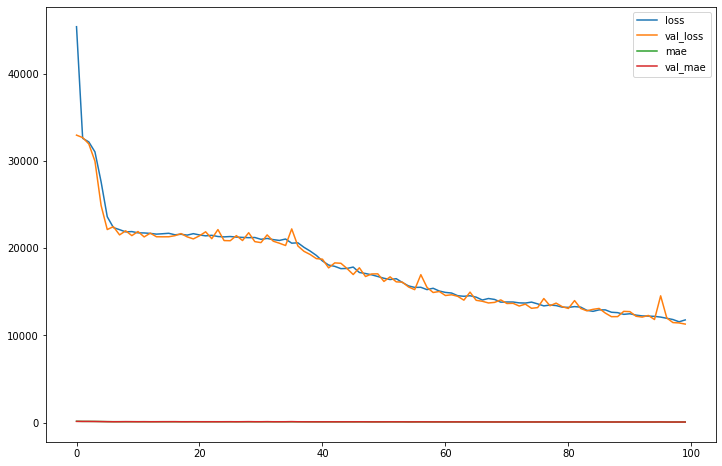

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.legend(['loss','val_loss', 'mae','val_mae'])
plt.show()